<a href="https://colab.research.google.com/github/RMHuerta/Average-Internet-Speeds-Across-Europe/blob/main/visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Elegi

Average Internet Speeds Across Europe
Data Source: Speedtest by Ookla Global Fixed and Mobile Network Performance Maps
https://www.makeovermonday.co.uk/data/data-sets-2022/

In [18]:
# Keep in mind that the filename will likely be different on your computer (especially later in course)
filename = '/content/drive/MyDrive/Colab Notebooks/Codificación_de_Dojo/Semana04/Average Internet Speeds Across Europe.xlsx'
df = pd.read_excel(filename)
df.head()

,Country,Country Name,quarter,average download speed,average upload speed,average latency
0,AL,Shqipëria,2019-01-01,15.30,7.33,27.72
1,AT,Österreich,2019-01-01,34.15,10.89,30.95
2,BE,Belgique/België,2019-01-01,62.19,13.86,17.87
3,BG,Bulgaria,2019-01-01,40.68,30.56,12.43
4,CH,Schweiz/Suisse/Svizzera,2019-01-01,88.88,48.23,17.06


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 522 non-null    object        
 1   Country Name            522 non-null    object        
 2   quarter                 522 non-null    datetime64[ns]
 3   average download speed  521 non-null    float64       
 4   average upload speed    522 non-null    float64       
 5   average latency         522 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 24.6+ KB


In [20]:
# Count the duplicates
df.duplicated().sum()

0

In [21]:
# Examine the number of unique values in columns
df.nunique()

Country                    41
Country Name               41
quarter                    14
average download speed    509
average upload speed      505
average latency           458
dtype: int64

In [22]:
#datos faltantes
df.isna().sum()

Country                   0
Country Name              0
quarter                   0
average download speed    1
average upload speed      0
average latency           0
dtype: int64

In [23]:
num_missing = df['average download speed'].isna().sum()

total_rows = df.shape[0]

percent_missing = num_missing / total_rows
print(f'{percent_missing:.2f}% of the data in the Cabin column is missing')

0.00% of the data in the Cabin column is missing


In [24]:
# Check the unique values and counts of the 'Sex' column
df['Country Name'].value_counts()

Shqipëria                  14
Polska                     14
Luxembourg                 14
Latvija                    14
Crna Gora                  14
Severna Makedonija         14
Malta                      14
Nederland                  14
Norge                      14
Portugal                   14
Liechtenstein              14
România                    14
Serbia                     14
Sverige                    14
Slovenija                  14
Slovensko                  14
Türkiye                    14
United Kingdom             14
Österreich                 14
Lietuva                    14
Italia                     14
Eesti                      14
Belgique/België            14
Bulgaria                   14
Schweiz/Suisse/Svizzera    14
Kýpros                     14
Česko                      14
Deutschland                14
Ísland                     14
Danmark                    14
Elláda                     14
España                     14
Suomi/Finland              14
France    

In [25]:
#resumen dataframe
df.describe()

,average download speed,average upload speed,average latency
count,521.000000,522.000000,522.000000
mean,84.543800,48.946264,16.740939
std,43.711733,39.915934,6.529256
min,15.300000,3.940000,4.770000
25%,49.230000,17.050000,11.845000
50%,80.000000,35.680000,15.715000
75%,111.320000,72.677500,19.827500
max,214.640000,191.660000,43.220000


In [26]:
#promedio latencia por trimestre
df.groupby(['quarter'])['average latency'].mean()


quarter
2019-01-01    22.578108
2019-04-01    23.020811
2019-07-01    20.721351
2019-10-01    17.675676
2020-01-01    17.334595
2020-04-01    16.882432
2020-07-01    16.510811
2020-10-01    15.368108
2021-01-01    14.747568
2021-04-01    14.387838
2021-07-01    14.754324
2021-10-01    13.809730
2022-01-01    13.451351
2022-04-01    13.482683
Name: average latency, dtype: float64

In [27]:
Trimestres = df.groupby(['quarter'])['average latency'].mean()

In [28]:
Trimestre = np.array(Trimestres.index)
Trimestre

array(['2019-01-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [29]:
latencia_promedio = np.array(Trimestres.values)
latencia_promedio

array([22.57810811, 23.02081081, 20.72135135, 17.67567568, 17.33459459,
       16.88243243, 16.51081081, 15.36810811, 14.74756757, 14.38783784,
       14.75432432, 13.80972973, 13.45135135, 13.48268293])

Text(0.5, 1.0, 'Promedio Latencia por trimestre')

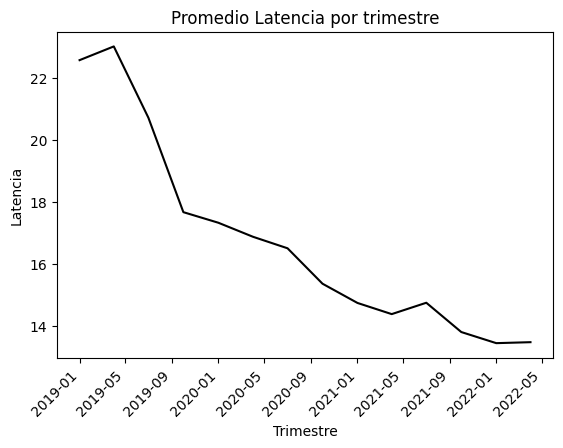

In [30]:
#Promedio latencia por trimestre
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.autofmt_xdate(rotation=45)
axes.plot(Trimestre, latencia_promedio, c= 'k');
axes.set_xlabel('Trimestre')
axes.set_ylabel('Latencia')
axes.set_title('Promedio Latencia por trimestre')

In [31]:
#promedio descarga por trimestre
df.groupby(['quarter'])['average download speed'].mean()

quarter
2019-01-01     55.221892
2019-04-01     56.211892
2019-07-01     59.757568
2019-10-01     65.735135
2020-01-01     67.589459
2020-04-01     71.999730
2020-07-01     74.095946
2020-10-01     83.991351
2021-01-01     92.134054
2021-04-01    102.190278
2021-07-01    101.178378
2021-10-01    113.661892
2022-01-01    120.824865
2022-04-01    116.087561
Name: average download speed, dtype: float64

In [32]:
Trimestres_2 = df.groupby(['quarter'])['average download speed'].mean()

descarga_promedio = np.array(Trimestres_2.values)
descarga_promedio

array([ 55.22189189,  56.21189189,  59.75756757,  65.73513514,
        67.58945946,  71.99972973,  74.09594595,  83.99135135,
        92.13405405, 102.19027778, 101.17837838, 113.66189189,
       120.82486486, 116.08756098])

Text(0.5, 1.0, 'Promedio Descarga por trimestre')

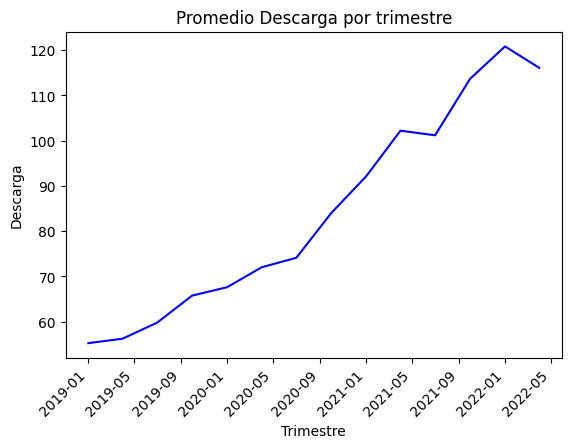

In [33]:
#Promedio descarga por trimestre
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.autofmt_xdate(rotation=45)
axes.plot(Trimestre, descarga_promedio, c= 'b');
axes.set_xlabel('Trimestre')
axes.set_ylabel('Descarga')
axes.set_title('Promedio Descarga por trimestre')